# Import Library

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load data

In [9]:
df = pd.read_excel("../dataset/data_pip_cleaned.xlsx")
df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Jalan kaki,Wirausaha,4213001,1,Tidak,Tidak,Tidak Layak
1,Sepeda motor,Lainnya,3249958,Lebih dari 3,Tidak,Tidak,Layak
2,Jalan kaki,Peternak,4166323,2,Tidak,Tidak,Tidak Layak
3,Jalan kaki,Lainnya,3261966,2,Tidak,Tidak,Tidak Layak
4,Sepeda motor,Wirausaha,3254943,Lebih dari 3,Tidak,Tidak,Layak


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Alat Transportasi      1000 non-null   object
 1   Pekerjaan Orang Tua    1000 non-null   object
 2   Penghasilan Orang Tua  1000 non-null   int64 
 3   Jumlah Tanggungan      1000 non-null   object
 4   Pemilik KIP            1000 non-null   object
 5   Pemilik KPS            1000 non-null   object
 6   Status                 1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


# Preprocessing Data

In [11]:
# pilih otomatis kolom numerik
num_columns = df.select_dtypes(include=[np.number]).columns

# standarkan fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,Jalan kaki,Wirausaha,1.179092,1,Tidak,Tidak,Tidak Layak
1,Sepeda motor,Lainnya,0.417046,Lebih dari 3,Tidak,Tidak,Layak
2,Jalan kaki,Peternak,1.142156,2,Tidak,Tidak,Tidak Layak
3,Jalan kaki,Lainnya,0.426548,2,Tidak,Tidak,Tidak Layak
4,Sepeda motor,Wirausaha,0.420991,Lebih dari 3,Tidak,Tidak,Layak


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# pilih tipe kategorical
cat_columns = df.select_dtypes(include=['object']).columns

# encode categorical variables
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Alat Transportasi,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan,Pemilik KIP,Pemilik KPS,Status
0,0,4,1.179092,0,0,0,1
1,1,1,0.417046,3,0,0,0
2,0,3,1.142156,1,0,0,1
3,0,1,0.426548,1,0,0,1
4,1,4,0.420991,3,0,0,0


# Split data

In [13]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# prrint shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)


# Modeling ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

#  Build model ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                

# Training Model

In [18]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 8ms/step - loss: 0.6882 - accuracy: 0.5500 - val_loss: 0.6767 - val_accuracy: 0.6000
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5922 - val_loss: 0.6579 - val_accuracy: 0.6125
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6047 - val_loss: 0.6450 - val_accuracy: 0.6313
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6375 - val_loss: 0.6490 - val_accuracy: 0.6000
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6391 - val_loss: 0.6427 - val_accuracy: 0.6250
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6531 - val_loss: 0.6439 - val_accuracy: 0.6375
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.6406 - val_loss: 0.6552 - val_accuracy: 0.6250
Epoch 8/10
20/20 [==

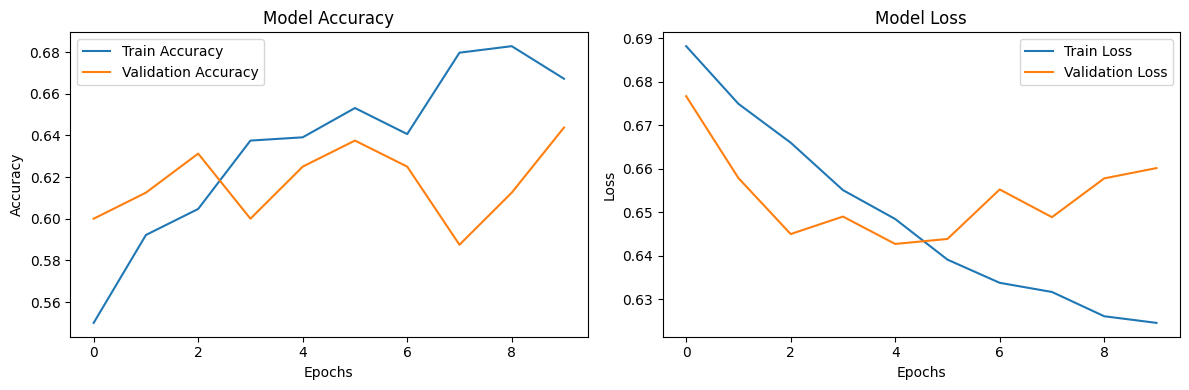

In [19]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
loss_train, accuracy_train = model.evaluate(X_train, y_train)

print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")
print("=====================================")
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Loss: {loss_train}")




25/25 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6737
Test Accuracy: 0.6050000190734863
Test Loss: 0.664878249168396
Train Accuracy: 0.6737499833106995
Train Loss: 0.6208882331848145


In [28]:
# print akurasi score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

7/7 [==============================] - 0s 1ms/step
Accuracy: 0.605


7/7 [==============================] - 0s 2ms/step


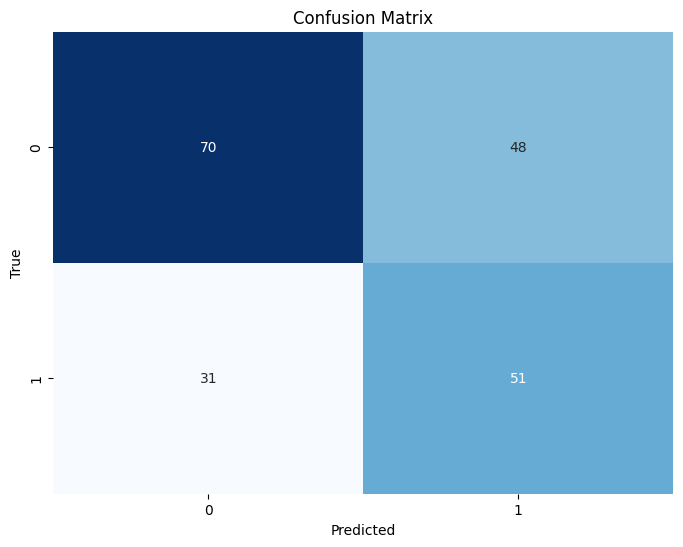

In [ ]:
# Predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()